# Fuzzy Scaffolds

Fuzzy scaffolding is a concept useful for scaffold decoration and constrained scaffolding. If you want finer control over the generation of your scaffolds, you can use the fuzzy scaffold function to **enforce specific groups** that need to appear in the core as a sort of pharmacophore requirement.

**Note:** A pharmacophore is essentially “[a part of a molecular structure that is responsible for a particular biological or pharmacological interaction that it undergoes](https://link.springer.com/referenceworkentry/10.1007/978-3-642-16483-5_4502)”. 

You can also force R groups to be included as well, allowing for flexibility to reconstruct specified positions (attachment points) in the scaffold. Overall, it allows you to build a highly specific [molecular series to be used for MMPA](https://pubs.acs.org/doi/10.1021/jm500022q#:~:text=A%20matched%20molecular%20series%20is,groups%20at%20the%20same%20position.). 

## Understanding Key Parameters

- **enforce_subs -** this lets you specify what substructure(s) you want to enforce on the scaffold
- **n_atom_cuttoff** - the minimum number of atoms a core should have. The smaller the number, the smaller the new scaffolds will be or the lesser number of new scaffolds will be generated, vice versa is true.
- **ignore_non_ring -** Some scaffolds might be a simple aliphatic chain, in other words, a molecule that only contains straight/branched chains with no rings. Most of the time, you want to ***ignore these scaffolds*** as they typically don’t translate well in a drug like context.
- **mcs_params -** This is quite a niche parameter. If two molecules in your dataset have a different Murcko scaffold but the same Minimum Common scaffold, toggling this argument will categorize these molecules into the same bucket using a [maximum common substructure algorithm](https://www.rdkit.org/docs/GettingStartedInPython.html#maximum-common-substructure).

## Datamol Example

RDKit WARNING: [12:45:39] WARNING: not removing hydrogen atom without neighbors
[12:45:39] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:45:39] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:45:39] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:45:39] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [12:45:39] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:45:39] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [12:45:39] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:45:39] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [12:45:39] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:45:39] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:45:39] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:45:39] WARNI

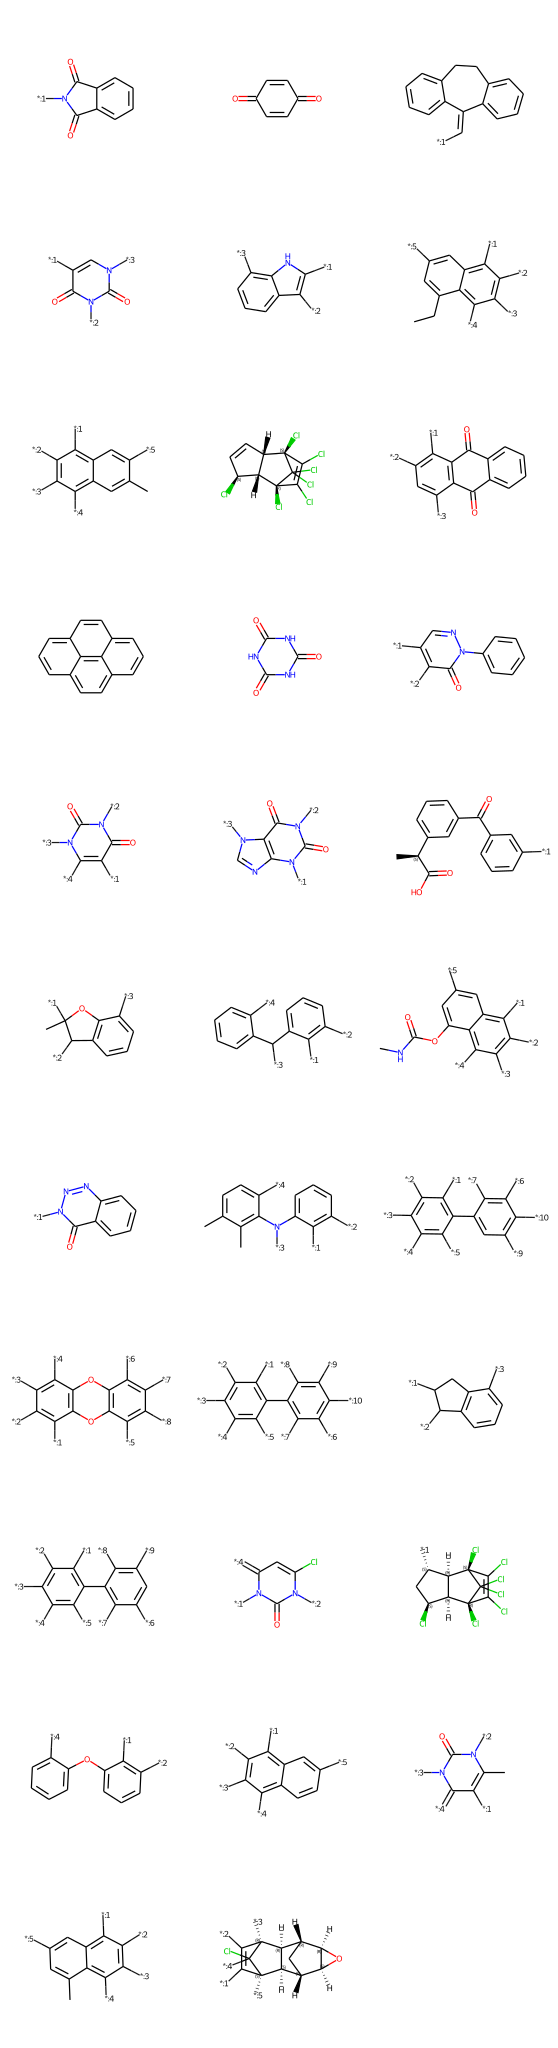

In [3]:
import datamol as dm

# Get some mols
data = dm.data.freesolv()
smiles = data["smiles"].iloc[:].tolist()
mols = [dm.to_mol(s) for s in smiles]

scaffolds, scf2infos, scf2groups = dm.scaffold.fuzzy_scaffolding(mols)

sfs = [dm.to_mol(s) for s in list(scaffolds)]
dm.viz.to_image(sfs, n_cols=3)